In [42]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from prettytable import PrettyTable
from sklearn.naive_bayes import GaussianNB
import time
from sklearn.metrics import classification_report, confusion_matrix

In [43]:
filepath = "D:\CYBER ATTACK DETECTION  PROJECT\CODE\FINAL DATASET\iot_final_combined-datasets.csv"

In [44]:
df = pd.read_csv(filepath, nrows=1500000, dtype={'id_orig_h': str})

In [45]:
df.head()

,Unnamed: 0,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,...,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR
0,0,2.998796,0,0,0.0,3.0,180.0,0.0,0.0,PartOfAHorizontalPortScan,...,0,0,0,1,0,0,0,0,0,0
1,1,0.000000,0,0,0.0,1.0,60.0,0.0,0.0,PartOfAHorizontalPortScan,...,0,0,0,1,0,0,0,0,0,0
2,2,0.000000,0,0,0.0,1.0,60.0,0.0,0.0,PartOfAHorizontalPortScan,...,0,0,0,1,0,0,0,0,0,0
3,3,2.998804,0,0,0.0,3.0,180.0,0.0,0.0,Benign,...,0,0,0,1,0,0,0,0,0,0
4,4,0.000000,0,0,0.0,1.0,60.0,0.0,0.0,Benign,...,0,0,0,1,0,0,0,0,0,0


In [46]:
del df['Unnamed: 0']

In [47]:
df.shape

(1444674, 27)

In [48]:
df['label'].value_counts()

PartOfAHorizontalPortScan     825939
Okiru                         262690
Benign                        197809
DDoS                          138777
C&C                            15100
Attack                          3915
C&C-HeartBeat                    349
C&C-FileDownload                  43
C&C-Torii                         30
FileDownload                      13
C&C-HeartBeat-FileDownload         8
C&C-Mirai                          1
Name: label, dtype: int64

<Axes: xlabel='label', ylabel='count'>

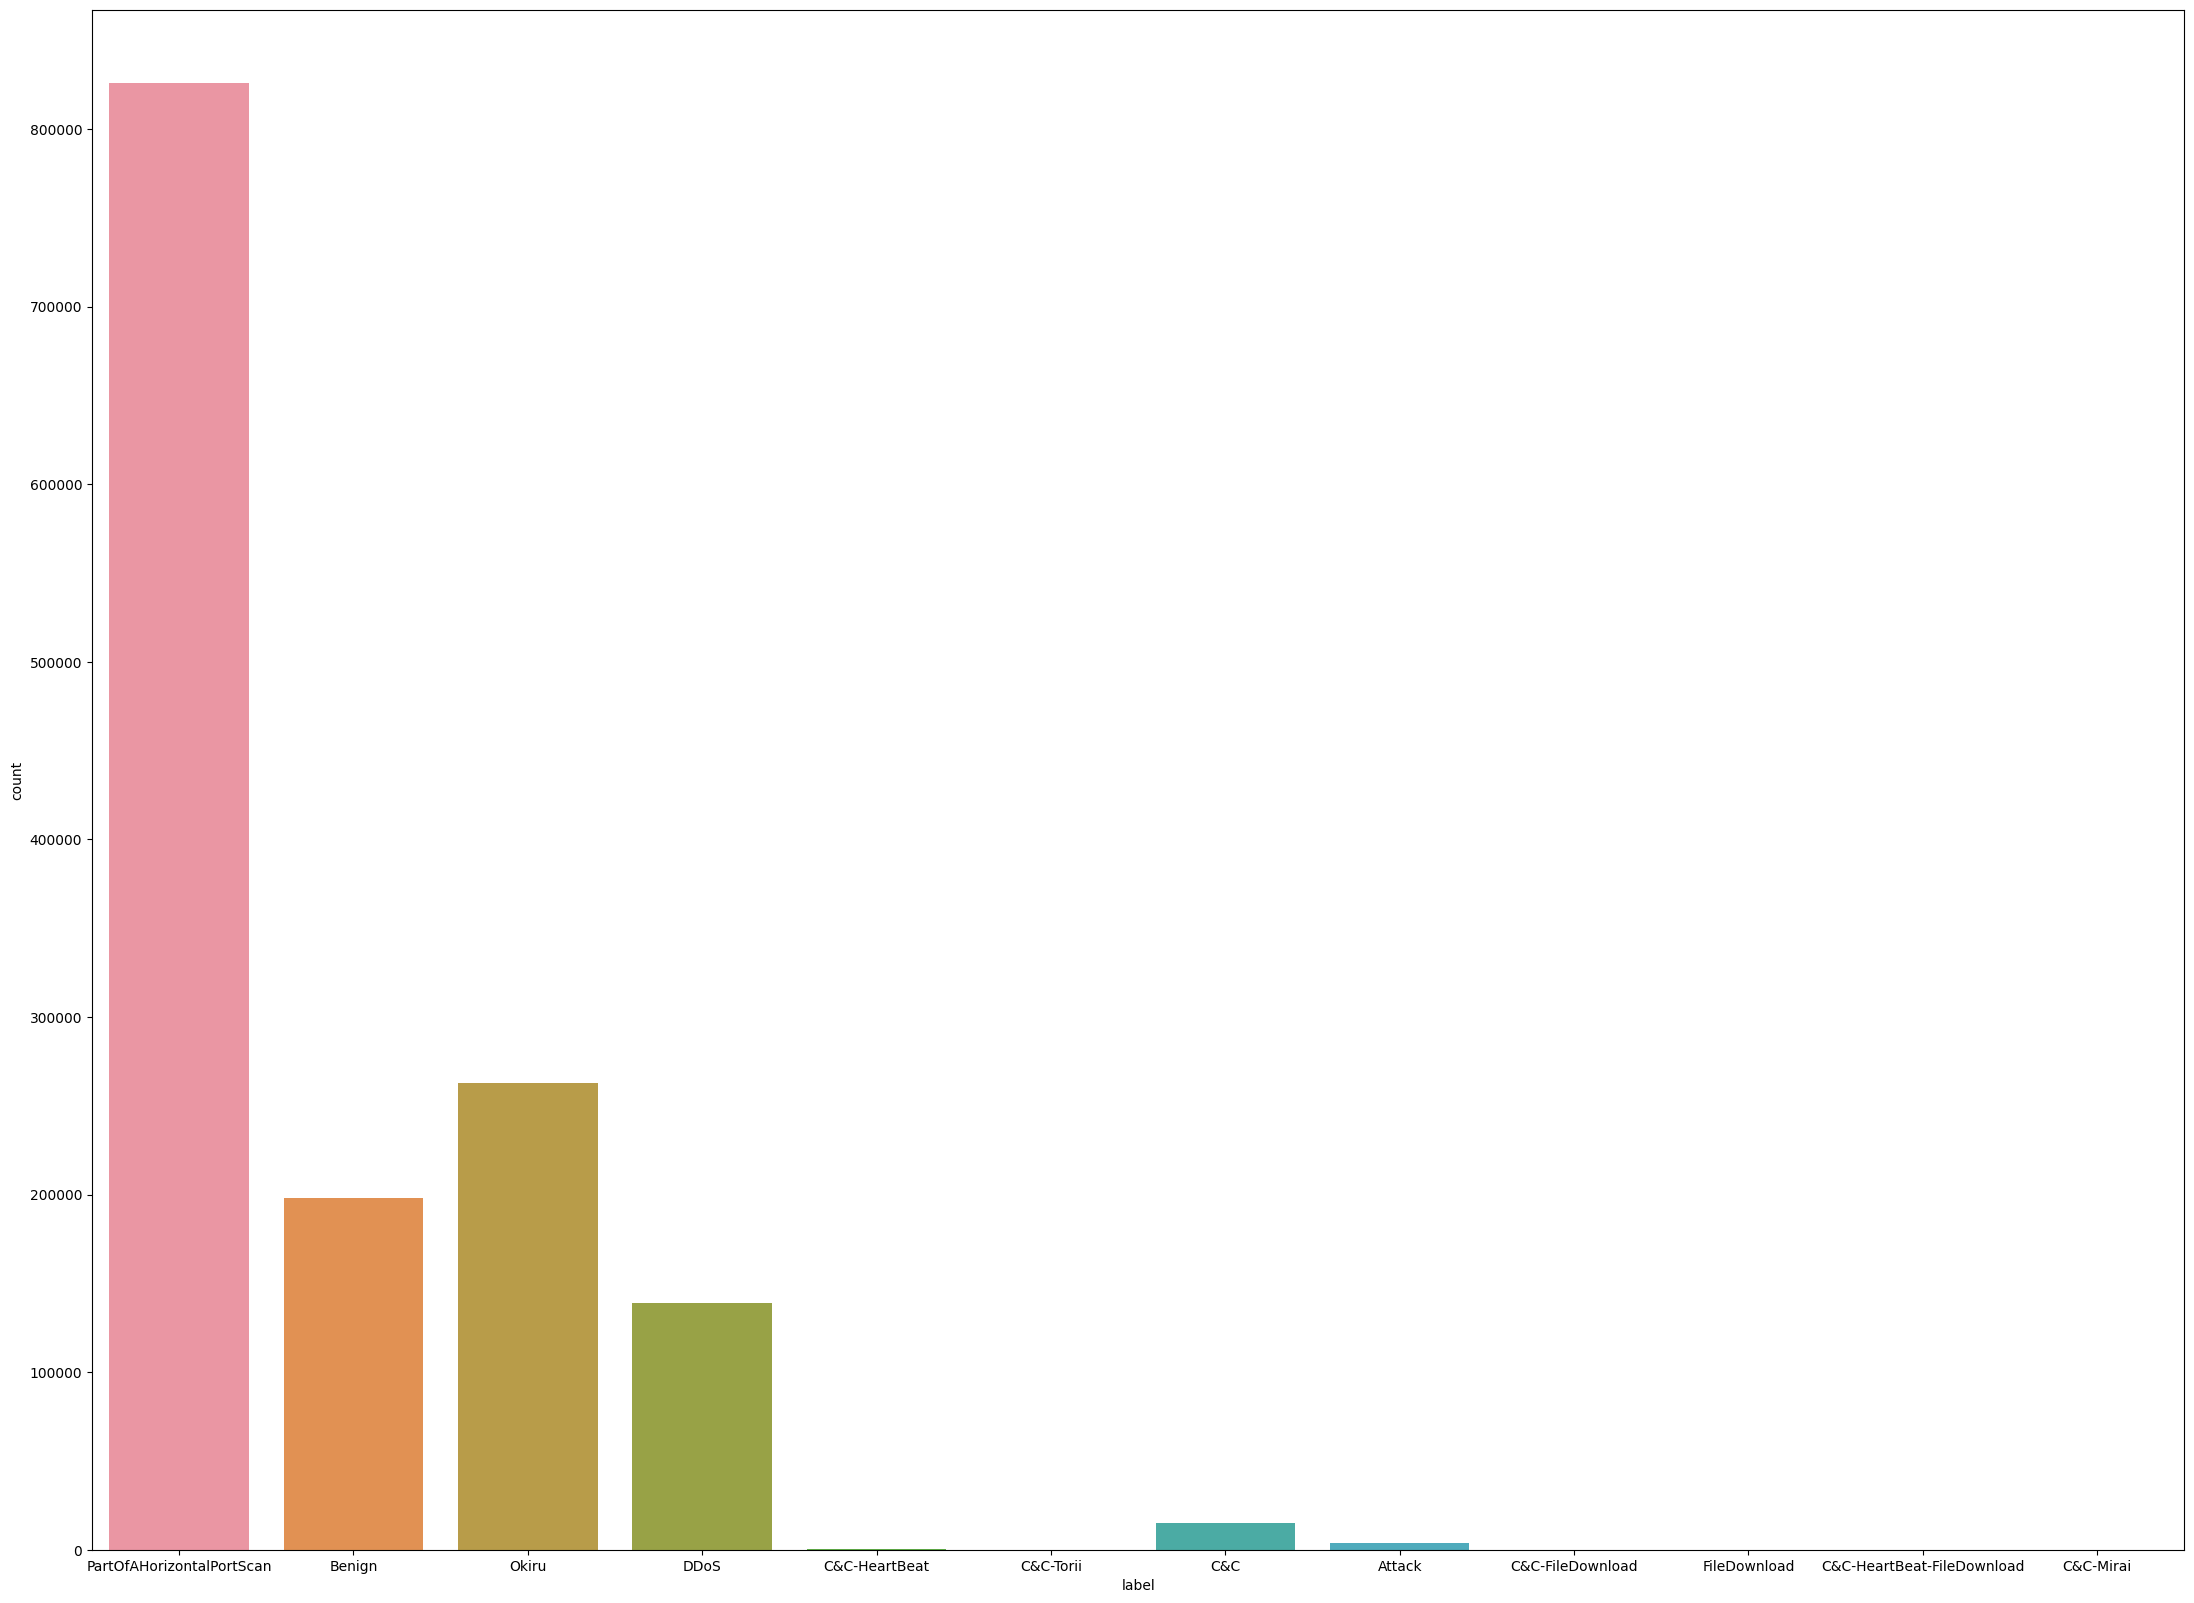

In [49]:
plt.figure(figsize = (27,20))
sns.countplot(x = df['label'])

In [50]:
df.columns = ['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'label', 'id_orig_h','misses_bytes','proto_icmp', 'proto_tcp', 'proto_udp', 'conn_state_OTH', 'conn_state_REJ', 'conn_state_RSTO', 'conn_state_RSTOS0', 'conn_state_RSTR', 'conn_state_RSTRH', 'conn_state_S0', 'conn_state_S1', 'conn_state_S2', 'conn_state_S3', 'conn_state_SF', 'conn_state_SH', 'conn_state_SHR']

In [51]:
for col in df.columns: 
    print(col) 

duration
orig_bytes
resp_bytes
missed_bytes
orig_pkts
orig_ip_bytes
resp_pkts
resp_ip_bytes
label
id_orig_h
misses_bytes
proto_icmp
proto_tcp
proto_udp
conn_state_OTH
conn_state_REJ
conn_state_RSTO
conn_state_RSTOS0
conn_state_RSTR
conn_state_RSTRH
conn_state_S0
conn_state_S1
conn_state_S2
conn_state_S3
conn_state_SF
conn_state_SH
conn_state_SHR


In [52]:
print(df.columns.tolist())

['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'label', 'id_orig_h', 'misses_bytes', 'proto_icmp', 'proto_tcp', 'proto_udp', 'conn_state_OTH', 'conn_state_REJ', 'conn_state_RSTO', 'conn_state_RSTOS0', 'conn_state_RSTR', 'conn_state_RSTRH', 'conn_state_S0', 'conn_state_S1', 'conn_state_S2', 'conn_state_S3', 'conn_state_SF', 'conn_state_SH', 'conn_state_SHR']


In [53]:
X = df[['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'proto_icmp', 'proto_tcp', 'proto_udp', 'conn_state_OTH', 'conn_state_REJ', 'conn_state_RSTO', 'conn_state_RSTOS0', 'conn_state_RSTR', 'conn_state_RSTRH', 'conn_state_S0', 'conn_state_S1', 'conn_state_S2', 'conn_state_S3', 'conn_state_SF', 'conn_state_SH', 'conn_state_SHR']]
Y = df['label']

In [54]:
# Split dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [55]:
# svm = SVC()
# svm.fit(X_train, Y_train)
# svm_pred = svm.predict(X_test)
# svm_acc = accuracy_score(Y_test, svm_pred)

In [56]:
ny = GaussianNB()
ny.fit(X_train, Y_train)

ny_pred = ny.predict(X_test)

ny_acc = accuracy_score(Y_test, ny_pred)
ny_f1 = f1_score(Y_test, ny_pred, average='macro')
ny_recall = recall_score(Y_test, ny_pred, average='macro')
ny_precision = precision_score(Y_test, ny_pred, average='macro')

C:\Users\aksha\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)
rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(Y_test, rf_pred)

In [58]:
le = LabelEncoder()
Y_train = le.fit_transform(Y_train)
Y_test = le.transform(Y_test)

# XGBoost
xgb = XGBClassifier()
xgb.fit(X_train, Y_train)
xgb_pred = xgb.predict(X_test)
xgb_acc = accuracy_score(Y_test, xgb_pred)
xgb_f1 = f1_score(Y_test, xgb_pred,average='macro')
xgb_recall = recall_score(Y_test, xgb_pred,average='macro')
xgb_precision = precision_score(Y_test, xgb_pred,average='macro')

In [59]:
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)
dt_pred = dt.predict(X_test)

# Evaluate Decision Tree performance
dt_acc = accuracy_score(Y_test, dt_pred)
dt_f1 = f1_score(Y_test, dt_pred,average='macro')
dt_recall = recall_score(Y_test, dt_pred,average='macro')
dt_precision = precision_score(Y_test, dt_pred,average='macro')

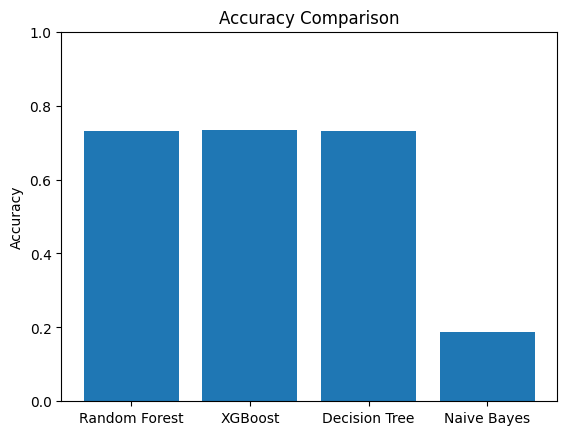

In [60]:
labels = ['Random Forest', 'XGBoost','Decision Tree', 'Naive Bayes']
accuracies = [rf_acc,xgb_acc,dt_acc,ny_acc]
plt.bar(labels, accuracies)
plt.ylim([0, 1])
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.show()

In [61]:
# svm = SVC(kernel='linear')

# # Fit the SVM model on the training data
# svm.fit(X_train, Y_train)

# # Make predictions on the test data
# svm_pred = svm.predict(X_test)

# # Calculate the accuracy, F1 score, recall, and precision of the SVM model
# svm_acc = accuracy_score(Y_test, svm_pred)
# svm_f1 = f1_score(Y_test, svm_pred, average='macro')
# svm_recall = recall_score(Y_test, svm_pred, average='macro')
# svm_precision = precision_score(Y_test, svm_pred, average='macro')

In [62]:
start = time.time()

ny = GaussianNB()
ny.fit(X_train, Y_train)

ny_pred = ny.predict(X_test)

ny_acc = accuracy_score(Y_test, ny_pred)
ny_f1 = f1_score(Y_test, ny_pred, average='macro')
ny_recall = recall_score(Y_test, ny_pred, average='macro')
ny_precision = precision_score(Y_test, ny_pred, average='macro')
end = time.time()

ny_time = (end - start) / 60

C:\Users\aksha\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [63]:
start = time.time()
rf = RandomForestClassifier()

# Fit the Random Forest model on the training data
rf.fit(X_train, Y_train)

# Make predictions on the test data
rf_pred = rf.predict(X_test)

# Calculate the accuracy, F1 score, recall, and precision of the Random Forest model
rf_acc = accuracy_score(Y_test, rf_pred)
rf_f1 = f1_score(Y_test, rf_pred, average='macro')
rf_recall = recall_score(Y_test, rf_pred, average='macro')
rf_precision = precision_score(Y_test, rf_pred, average='macro')
end = time.time()

rf_time = (end - start) / 60

In [64]:
start = time.time()
le = LabelEncoder()
Y_train = le.fit_transform(Y_train)
Y_test = le.transform(Y_test)

# XGBoost
xgb = XGBClassifier()
xgb.fit(X_train, Y_train)
xgb_pred = xgb.predict(X_test)
xgb_acc = accuracy_score(Y_test, xgb_pred)
xgb_f1 = f1_score(Y_test, xgb_pred,average='macro')
xgb_recall = recall_score(Y_test, xgb_pred,average='macro')
xgb_precision = precision_score(Y_test, xgb_pred,average='macro')
end = time.time()

xgb_time = (end - start) / 60

In [65]:
start = time.time()
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)
dt_pred = dt.predict(X_test)


# Evaluate Decision Tree performance
dt_acc = accuracy_score(Y_test, dt_pred)
dt_f1 = f1_score(Y_test, dt_pred,average='macro')
dt_recall = recall_score(Y_test, dt_pred,average='macro')
dt_precision = precision_score(Y_test, dt_pred,average='macro')
end = time.time()

dt_time = (end - start) / 60

In [66]:
# create table
table = PrettyTable()
table.field_names = ["Algorithm", "Accuracy", "F1 Score", "Recall", "Precision", "Time"]
# table.add_row(["SVM", svm_acc, svm_f1, svm_recall, svm_precision])
table.add_row(["Random Forest", rf_acc, rf_f1, rf_recall, rf_precision, rf_time])
table.add_row(["XGBoost", xgb_acc, xgb_f1, xgb_recall, xgb_precision, xgb_time])
table.add_row(["Decision Tree", dt_acc, dt_f1, dt_recall, dt_precision, dt_time])
table.add_row(["Navie Bayes", ny_acc, ny_f1, ny_recall, ny_precision, ny_time])

# print table
print(table)

+---------------+---------------------+---------------------+--------------------+--------------------+----------------------+
|   Algorithm   |       Accuracy      |       F1 Score      |       Recall       |     Precision      |         Time         |
+---------------+---------------------+---------------------+--------------------+--------------------+----------------------+
| Random Forest |  0.732410403724021  |  0.6095186323666001 | 0.5786624263601813 | 0.8098990756720267 |  0.7525552908579508  |
|    XGBoost    |  0.7328880197968402 |  0.6337691450463989 | 0.5863614835468007 | 0.9021950098807942 |  2.1512382944424946  |
| Decision Tree |  0.7324657795005797 |  0.6501994988466581 | 0.614777377083761  | 0.8128786015524686 | 0.025060343742370605 |
|  Navie Bayes  | 0.18712167096405766 | 0.32012950396982326 | 0.4109317779954621 | 0.575834024433688  | 0.019624380270640056 |
+---------------+---------------------+---------------------+--------------------+--------------------+--------

In [67]:
# Create comparison graph
algorithms = ['Random Forest','XGBoost', 'Decision Tree', 'Navie Bayes']
accuracy_scores = [rf_acc,xgb_acc, dt_acc, ny_acc]
f1_scores = [rf_f1,xgb_f1, dt_f1, ny_f1]
recall_scores = [rf_recall,xgb_recall, dt_recall, ny_recall]
precision_scores = [rf_precision,xgb_precision, dt_precision, ny_precision]
time_cost = [rf_time,xgb_time,dt_time,ny_time]

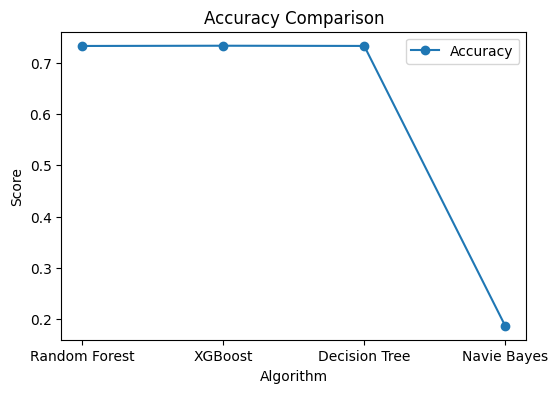

In [68]:
plt.figure(figsize=(6, 4))
plt.plot(algorithms, accuracy_scores, marker='o', label='Accuracy')
plt.title('Accuracy Comparison')
plt.xlabel('Algorithm')
plt.ylabel('Score')
plt.legend()
plt.show()

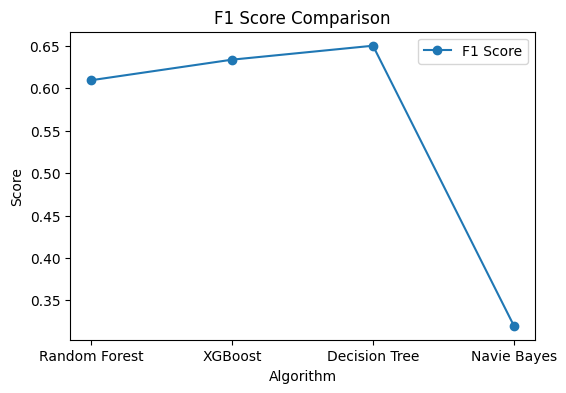

In [69]:
plt.figure(figsize=(6, 4))
plt.plot(algorithms, f1_scores, marker='o', label='F1 Score')
plt.title('F1 Score Comparison')
plt.xlabel('Algorithm')
plt.ylabel('Score')
plt.legend()
plt.show()

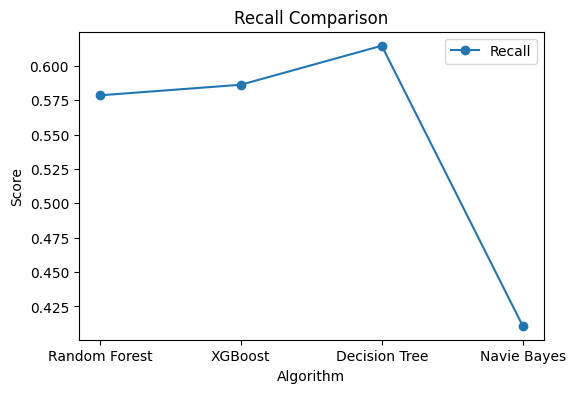

In [70]:
plt.figure(figsize=(6, 4))
plt.plot(algorithms, recall_scores, marker='o', label='Recall')
plt.title('Recall Comparison')
plt.xlabel('Algorithm')
plt.ylabel('Score')
plt.legend()
plt.show()

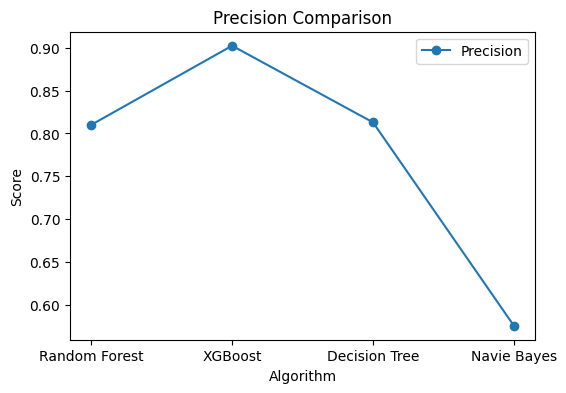

In [71]:
plt.figure(figsize=(6, 4))
plt.plot(algorithms, precision_scores, marker='o', label='Precision')
plt.title('Precision Comparison')
plt.xlabel('Algorithm')
plt.ylabel('Score')
plt.legend()
plt.show()

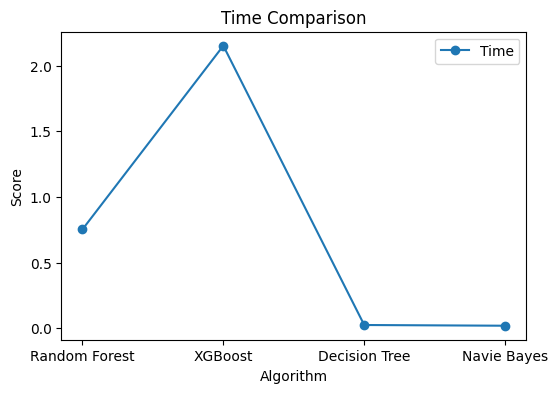

In [72]:
plt.figure(figsize=(6, 4))
plt.plot(algorithms, time_cost, marker='o', label='Time')
plt.title('Time Comparison')
plt.xlabel('Algorithm')
plt.ylabel('Score')
plt.legend()
plt.show()

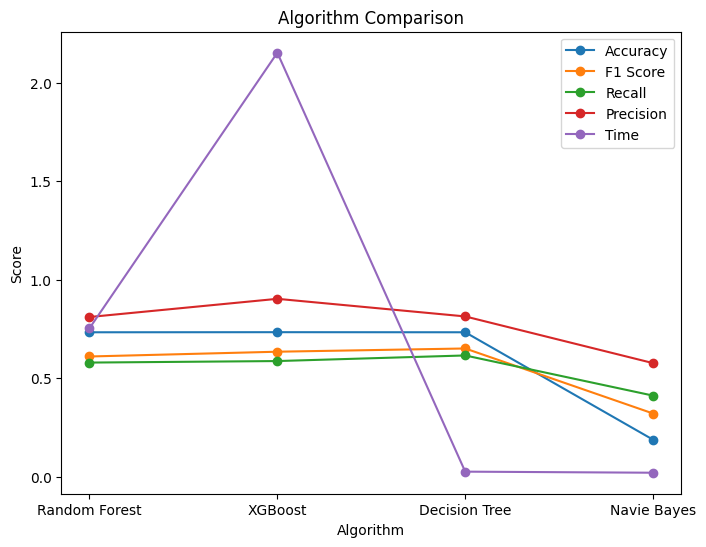

In [73]:
plt.figure(figsize=(8, 6))
plt.plot(algorithms, accuracy_scores, marker='o', label='Accuracy')
plt.plot(algorithms, f1_scores, marker='o', label='F1 Score')
plt.plot(algorithms, recall_scores, marker='o', label='Recall')
plt.plot(algorithms, precision_scores, marker='o', label='Precision')
plt.plot(algorithms, time_cost, marker='o', label='Time')
plt.title('Algorithm Comparison')
plt.xlabel('Algorithm')
plt.ylabel('Score')
plt.legend()
plt.show()

In [74]:
models = ['Random Forest', 'XGBoost', 'Decision Tree', 'Navie Bayes']
accuracy = [rf_acc, xgb_acc, dt_acc, ny_acc]
f1 = [rf_f1, xgb_f1, dt_f1, ny_f1]
recall = [rf_recall, xgb_recall, dt_recall, ny_recall]
precision = [rf_precision, xgb_precision, dt_precision, ny_precision]
time = [rf_time, xgb_time, dt_time, ny_time]

In [75]:
x = np.arange(len(models))
width = 0.15

In [76]:
my_list = [accuracy, f1, recall, precision, time]
my_array = np.array(my_list)

print(my_array.shape)

(5, 4)


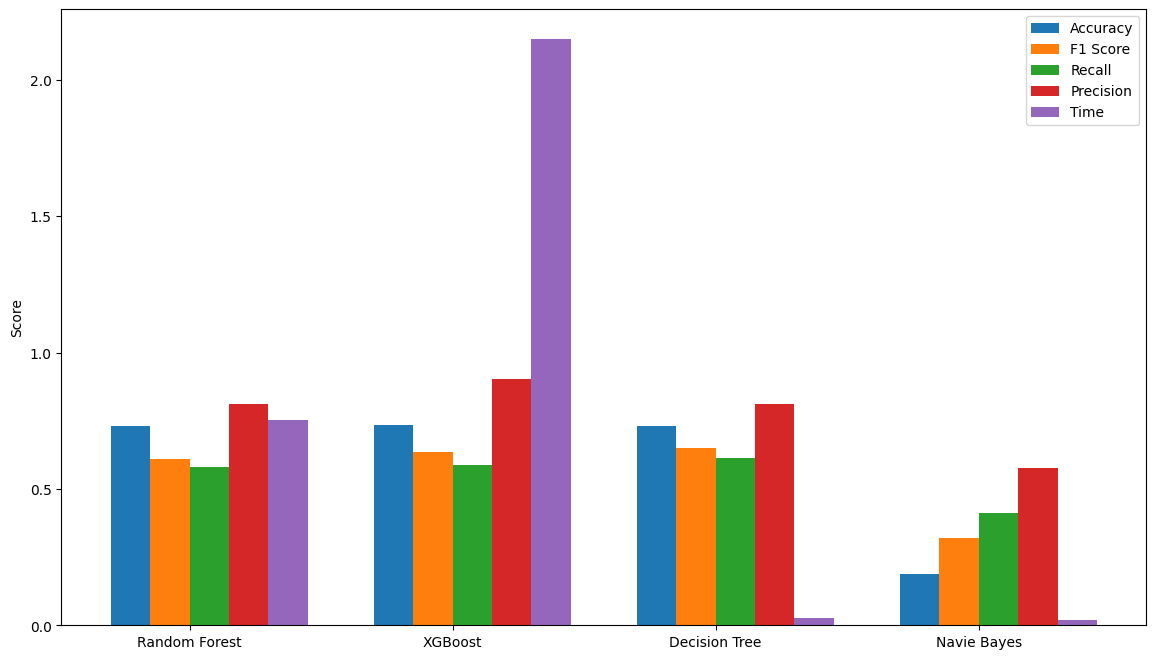

In [77]:
fig, ax = plt.subplots(figsize=(14, 8))
rects1 = ax.bar(x - 1.5*width, accuracy, width, label='Accuracy')
rects2 = ax.bar(x - 0.5*width, f1, width, label='F1 Score')
rects3 = ax.bar(x + 0.5*width, recall, width, label='Recall')
rects4 = ax.bar(x + 1.5*width, precision, width, label='Precision')
rects5 = ax.bar(x + 2.5*width, time, width, label='Time')

ax.set_ylabel('Score')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.show()